# This notebook analyzes the Global Average Absolute Sea Level Change from year 1880-2014. 

In [1]:
#import libraries

import warnings
import datetime
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('./Final_Datset/sea_levels_2015.csv')
df
# GMSL = Global Mean Sea Level

,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2
...,...,...,...
1603,2013-08-15,71.6,8.8
1604,2013-09-15,68.8,8.8
1605,2013-10-15,66.4,8.9
1606,2013-11-15,59.7,9.0


In [3]:
df.isnull().sum()

Time                0
GMSL                0
GMSL uncertainty    0
dtype: int64

In [4]:
df.Time=df.Time.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              1608 non-null   datetime64[ns]
 1   GMSL              1608 non-null   float64       
 2   GMSL uncertainty  1608 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 37.8 KB
None


In [5]:
df.head()

,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2


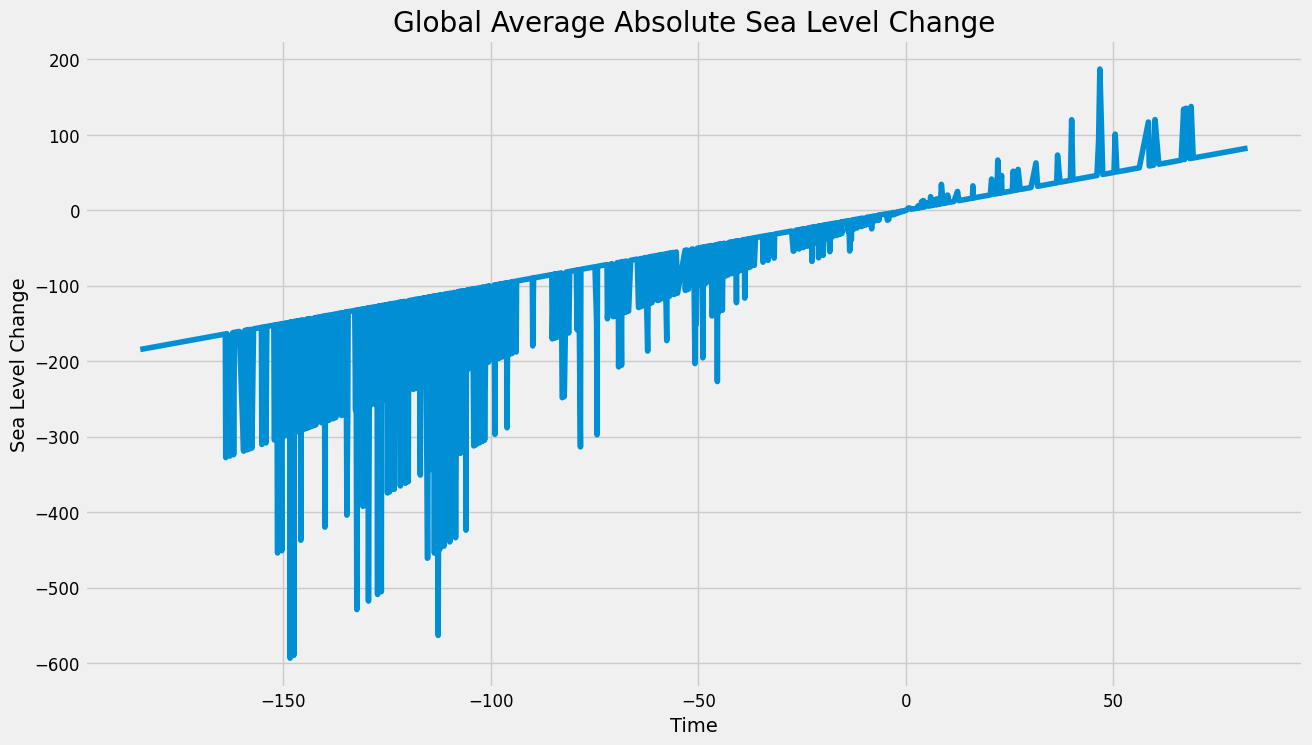

In [6]:
ts=df.groupby(["GMSL"])["GMSL"].sum()
ts.astype('float')
plt.figure(figsize=(14,8))
plt.title('Global Average Absolute Sea Level Change')
plt.xlabel('Time')
plt.ylabel('Sea Level Change')
plt.plot(ts);

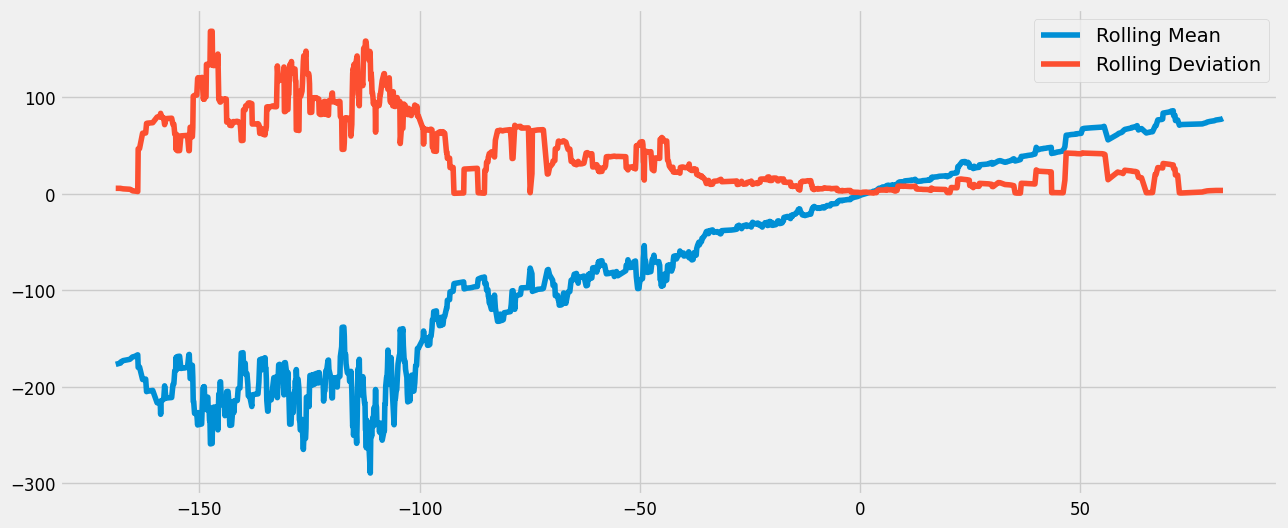

In [7]:
plt.figure(figsize=(14,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling Deviation');
plt.legend();

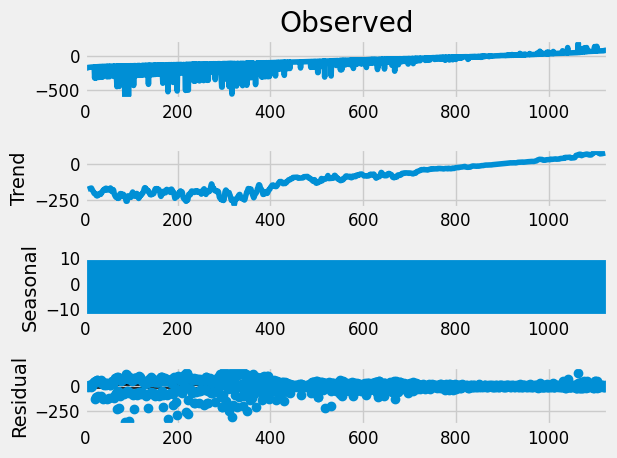

In [8]:
# Additive model
res = sm.tsa.seasonal_decompose(ts.values,period=12,model="additive")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

In [9]:
from prophet import Prophet

ts = df.rename(columns={'Time':'ds', 'GMSL':'y','GMSL uncertainty':'yhat'})

ts.columns=['ds','y','yhat']
model1 = Prophet( yearly_seasonality=True) 
model1.fit(ts)

22:31:48 - cmdstanpy - INFO - Chain [1] start processing
22:31:48 - cmdstanpy - INFO - Chain [1] done processing


In [10]:

future = model1.make_future_dataframe(periods = 180, freq = 'MS')  
forecast = model1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1783,2028-08-01,109.407863,98.722690,118.852519
1784,2028-09-01,112.693944,102.227956,122.345861
1785,2028-10-01,103.835442,93.212976,113.292600
1786,2028-11-01,110.197429,100.659424,120.325105
1787,2028-12-01,101.993805,92.727095,111.851025


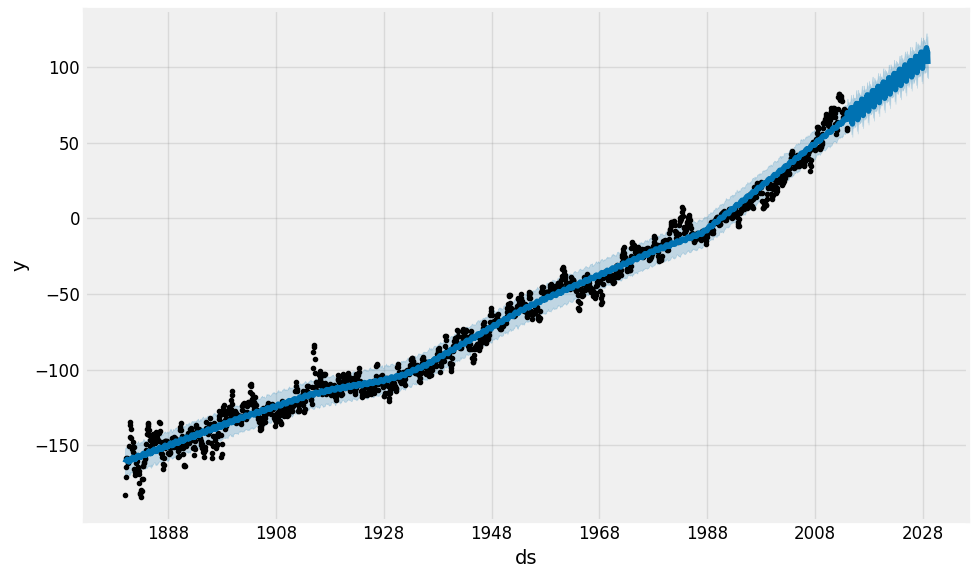

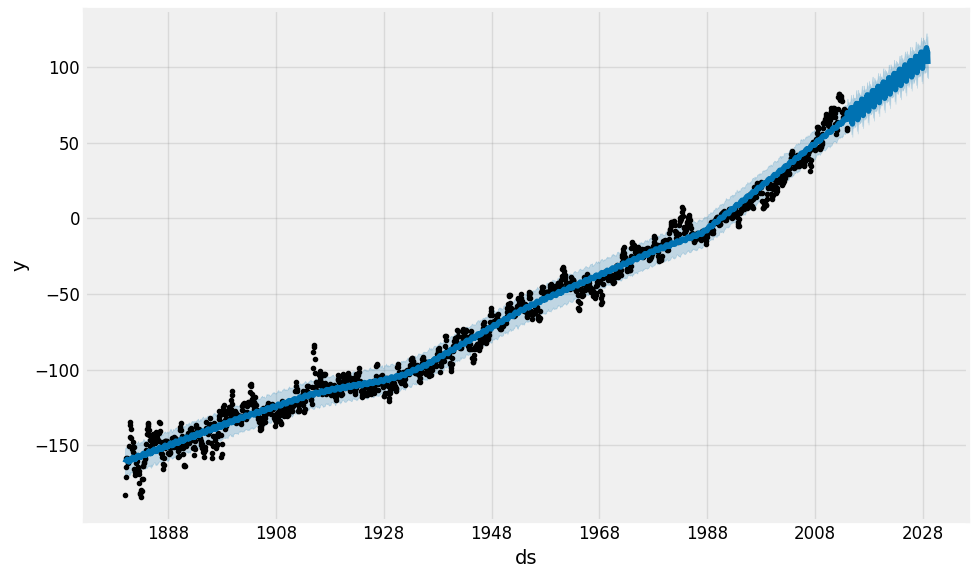

In [11]:
model1.plot(forecast)

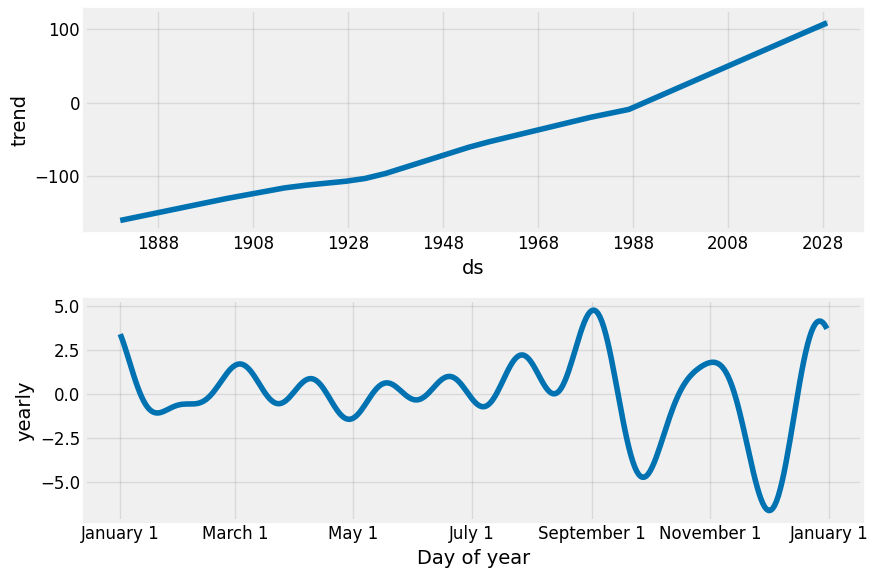

In [12]:
plot1 = model1.plot_components(forecast)

In [15]:
import math
import sklearn.metrics
y_true = ts['y'].values
y_pred = forecast['yhat'][:1608].values
mse = sklearn.metrics.mean_squared_error(y_true, y_pred) 
rmse = math.sqrt(mse)
rmse

7.074540111249435

The Root Mean Squared Error of Prophet Forecast is 7.07